In [1]:
# Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import numpy as np

In [2]:
epl_data = pd.read_csv('epl2020.csv.txt',sep=',')

In [3]:
epl_data.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [4]:
epl_data.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

In [5]:
teams = epl_data.teamId.unique()
teams

array(['Liverpool', 'Norwich', 'Man City', 'West Ham', 'Bournemouth',
       'Brighton', 'Burnley', 'Crystal Palace', 'Everton',
       'Sheffield United', 'Southampton', 'Watford', 'Aston Villa',
       'Tottenham', 'Arsenal', 'Leicester', 'Newcastle United', 'Wolves',
       'Chelsea', 'Man Utd'], dtype=object)

In [6]:
# getting actual and expected points for each team
actual_points = {}
expected_points = {}
for team in teams:
    actual_points[team]  = epl_data[epl_data['teamId']==team].pts.sum()
    expected_points[team]  = epl_data[epl_data['teamId']==team].xpts.sum()

In [7]:
pts_difference = {team:actual_points[team] - expected_points[team] for team in teams}
pts_difference

{'Liverpool': 22.187300000000008,
 'Norwich': -6.990100000000002,
 'Man City': -6.2076000000000064,
 'West Ham': 1.8093000000000004,
 'Bournemouth': -2.1305000000000014,
 'Brighton': -9.263100000000001,
 'Burnley': -0.5687000000000069,
 'Crystal Palace': 9.049499999999998,
 'Everton': -9.645900000000005,
 'Sheffield United': 3.9388999999999967,
 'Southampton': -7.094700000000003,
 'Watford': -10.548999999999992,
 'Aston Villa': 1.968799999999998,
 'Tottenham': 3.402799999999999,
 'Arsenal': 2.740099999999998,
 'Leicester': 5.3367,
 'Newcastle United': 13.124500000000005,
 'Wolves': -6.255699999999997,
 'Chelsea': -7.54760000000001,
 'Man Utd': -7.1007999999999925}

In [8]:
sorted_teams = sorted(pts_difference.keys(),key = pts_difference.get)
                      

In [9]:
sorted_teams

['Watford',
 'Everton',
 'Brighton',
 'Chelsea',
 'Man Utd',
 'Southampton',
 'Norwich',
 'Wolves',
 'Man City',
 'Bournemouth',
 'Burnley',
 'West Ham',
 'Aston Villa',
 'Arsenal',
 'Tottenham',
 'Sheffield United',
 'Leicester',
 'Crystal Palace',
 'Newcastle United',
 'Liverpool']

In [10]:
# Plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


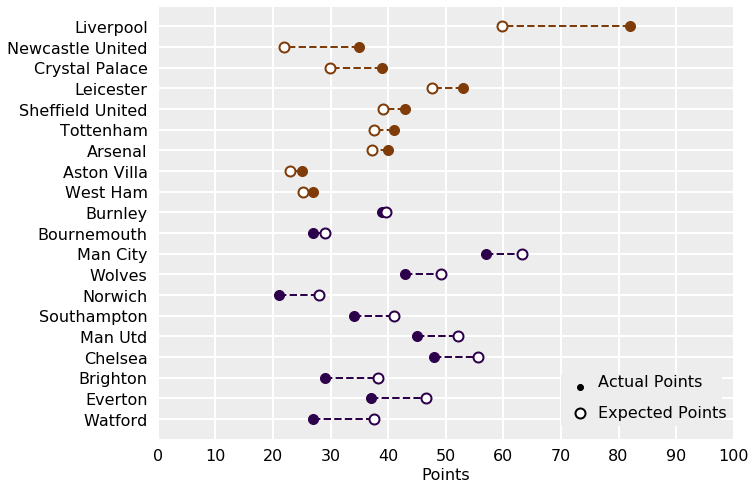

In [11]:
# create data points and connect them with a dashed line
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])

# get colours
colors = plt.get_cmap('PuOr',2)
yval = 0

for team in sorted_teams:
    if actual_points[team] > expected_points[team]:
        fill_color = colors(0)
    else:
        fill_color = colors(1)
    ax.plot([actual_points[team],expected_points[team]],[yval,yval],linestyle='--',linewidth=2,color=fill_color)
    ax.plot(actual_points[team],yval,'o',color=fill_color,markersize=10)
    ax.plot(expected_points[team],yval,'o',color='white',markeredgecolor=fill_color,markeredgewidth=2,markersize=10)
    yval +=1

leg = fig.add_axes([0.7,0.03,0.28,0.12])
leg.plot([0],[1],'o',color='black')
leg.text(0.3,1,'Actual Points')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Expected Points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)
    
#add_grid
ax.grid(color='white',linewidth=2)
#points_label
ax.set_xticks(np.arange(0,110,10))

#team_labels
ax.set_yticks(np.arange(0,len(sorted_teams),1))
ax.set_yticklabels(sorted_teams)

# sex axis limits
ax.set_xlim(0,100)

#set axis labels
ax.set_xlabel('Points')
plt.show()

Liverpool have highly overperformed this season. Based on just predictions Liverpool would be sitting second on the table which just shows how liverpool have been able to produce when required and step up their game at the right time

In [12]:
data_pl = pd.read_csv('players_1920.txt',sep=',')
pd.set_option('display.max_columns',None)

In [13]:
data_pl.head()

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team
0,1,0,0,1,0,0.1,534,37,1,0,0.0,0.2,2019-08-31 14:00:00,24,Man City,0,0,0,0,4,0,0,0,4,0,1,0,0,0,45,False,0,Aaron Connolly,Brighton
1,2,0,0,1,0,0.3,534,43,1,0,2.2,1.0,2019-09-14 14:00:00,6,Burnley,0,0,0,0,5,0,14029,1,1,21,1,10589,13500,2911,45,True,0,Aaron Connolly,Brighton
2,3,0,0,1,0,4.8,534,58,0,0,2.5,2.0,2019-09-21 16:30:00,20,Newcastle United,0,0,0,0,6,0,22804,0,0,18,1,8090,11749,3659,45,False,0,Aaron Connolly,Brighton
3,4,0,0,2,0,0.6,534,63,1,0,0.1,0.2,2019-09-28 14:00:00,25,Chelsea,0,0,0,0,7,0,32699,0,2,0,1,8437,13439,5002,45,False,0,Aaron Connolly,Brighton
4,5,0,3,53,1,23.8,534,72,0,2,20.1,70.2,2019-10-05 11:30:00,79,Tottenham,0,0,0,0,8,0,35026,0,3,107,13,2156,5952,3796,45,True,0,Aaron Connolly,Brighton


In [14]:
data_pl.columns

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team'],
      dtype='object')

In [15]:
players = data_pl.full.unique()

In [16]:
len(players)

628

In [17]:
player_assists = {}
player_goals = {}
for player in players:
    mins = data_pl[data_pl['full']==player].minutes.sum()/90
    if mins >= 10:
        player_assists[player] = data_pl[data_pl['full']==player].assists.sum()/mins
        player_goals[player] = data_pl[data_pl['full']==player].goals_scored.sum()/mins
    

In [18]:
top_player_goals = sorted(player_goals.keys(),key=player_goals.get,reverse=True)[:20]
top_player_assists = sorted(player_assists.keys(),key=player_assists.get,reverse=True)[:20]

In [19]:
top_player_assists
top_player_goals

['Sergio Ag?ero',
 'Jamie Vardy',
 'Danny Ings',
 'Gabriel Fernando de Jesus',
 'Marcus Rashford',
 'Pierre-Emerick Aubameyang',
 'Mohamed Salah',
 'Dominic Calvert-Lewin',
 'Sadio Man?',
 'Tammy Abraham',
 'Harry Kane',
 'Anthony Martial',
 'Raheem Sterling',
 'Alexandre Lacazette',
 'Chris Wood',
 'Ra?l Jim?nez',
 'Heung-Min Son',
 'Riyad Mahrez',
 'Lys Mousset',
 'Harry Wilson']

In [20]:
updated_names = {}
for player in players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '.' + split_name[-1]

# update names with special characters
updated_names['Sergio Ag?ero'] = 'S. Agüero'
updated_names['Sadio Man?'] = 'S. Mané'
updated_names['Ra?l Jim?nez'] = 'R. Jiménez'
updated_names['Nicolas P?p?'] = 'N. Pépé'
updated_names['Emiliano Buend?a'] = 'E. Buendía'
updated_names['Adama Traor?'] = 'A. Traoré'
updated_names['Pascal Gro?'] = 'P. Groß'
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

In [21]:
team_colors = {'Arsenal':'#ef0107', 'Aston Villa':'#95bfe5', 'Bournemouth':'#da291c', 'Brighton':'#0057b8','Burnley':'#6c1d45', 'Chelsea':'#034694', 'Crystal Palace':'#1b458f', 'Everton':'#003399','Leicester':'#003090', 'Liverpool':'#c8102e', 'Man City':'#6cabdd', 'Man Utd':'#da291c','Newcastle United':'#241f20', 'Norwich':'#fff200', 'Sheffield United':'#ee2737', 'Southampton':'#d71920', 'Tottenham':'#132257', 'Watford':'#fbee23', 'West Ham':'#7a263a','Wolves':'#fdb913'}

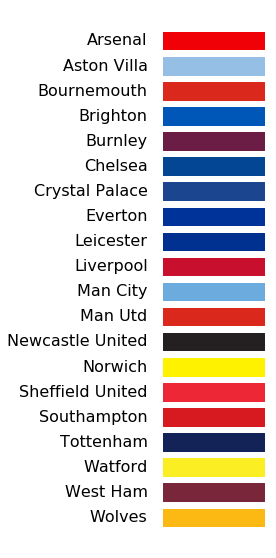

In [22]:
fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111,facecolor='white')

#plot colour swatches
y_val = 0
for team in sorted(teams,reverse=True):
    ax.fill_between([0,1],y_val+0.1,y_val+0.8,color=team_colors[team])
    y_val += 1
# Remove x-ticks
ax.set_xticks([])
# Set y-ticks to team names
ax.set_yticks(np.arange(0.5, 20, 1))
ax.set_yticklabels(sorted(teams, reverse=True))
plt.show()

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


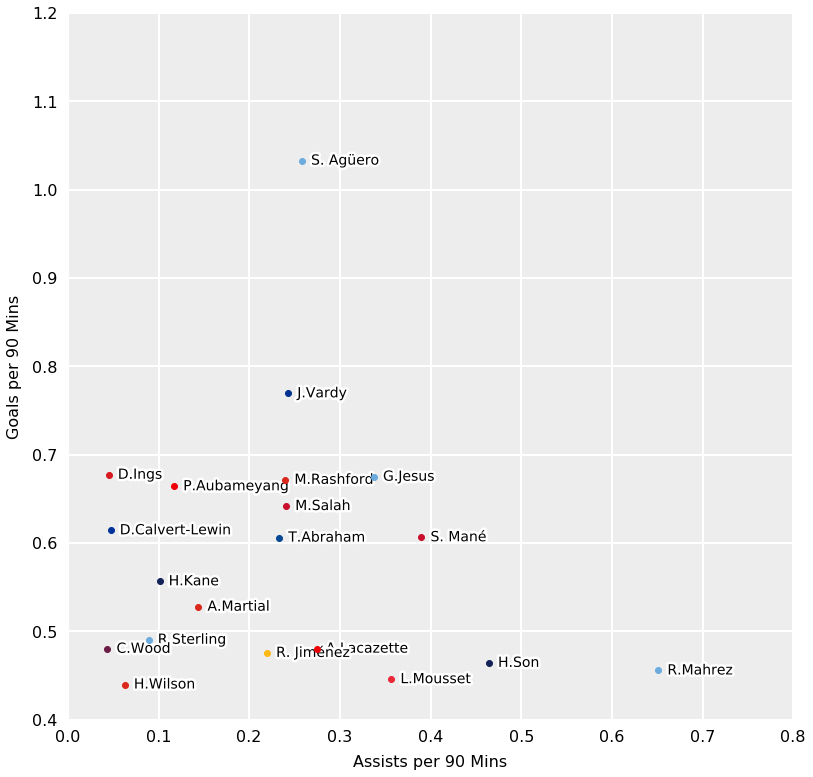

In [23]:

# Create Figure

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

# Plot player data
for player in top_player_goals:

    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1.2)
plt.show()

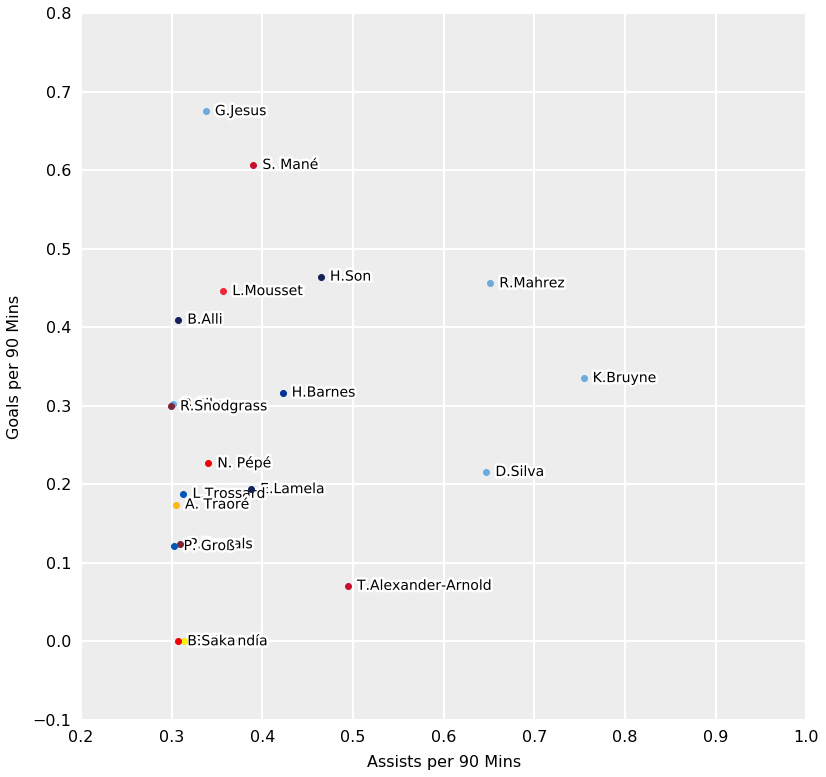

In [24]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

# Plot player data
for player in top_player_assists:

    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 0.8)

plt.show()

In [25]:
actual_points_2 = {}
expected_points_2 = {}
for team in teams:
    actual_points_2[team] = epl_data[epl_data['teamId']==team].pts.sum()
    expected_points_2[team] = epl_data[epl_data['teamId']==team].xpts.sum()
actual_points_2
expected_points_2

{'Liverpool': 59.81269999999999,
 'Norwich': 27.9901,
 'Man City': 63.207600000000006,
 'West Ham': 25.1907,
 'Bournemouth': 29.1305,
 'Brighton': 38.2631,
 'Burnley': 39.56870000000001,
 'Crystal Palace': 29.9505,
 'Everton': 46.645900000000005,
 'Sheffield United': 39.0611,
 'Southampton': 41.0947,
 'Watford': 37.54899999999999,
 'Aston Villa': 23.031200000000002,
 'Tottenham': 37.5972,
 'Arsenal': 37.2599,
 'Leicester': 47.6633,
 'Newcastle United': 21.875499999999995,
 'Wolves': 49.2557,
 'Chelsea': 55.54760000000001,
 'Man Utd': 52.10079999999999}

In [26]:
pts_difference_2 = {team:actual_points_2[team]-expected_points_2[team] for team in teams}

In [27]:
pts_difference_2

{'Liverpool': 22.187300000000008,
 'Norwich': -6.990100000000002,
 'Man City': -6.2076000000000064,
 'West Ham': 1.8093000000000004,
 'Bournemouth': -2.1305000000000014,
 'Brighton': -9.263100000000001,
 'Burnley': -0.5687000000000069,
 'Crystal Palace': 9.049499999999998,
 'Everton': -9.645900000000005,
 'Sheffield United': 3.9388999999999967,
 'Southampton': -7.094700000000003,
 'Watford': -10.548999999999992,
 'Aston Villa': 1.968799999999998,
 'Tottenham': 3.402799999999999,
 'Arsenal': 2.740099999999998,
 'Leicester': 5.3367,
 'Newcastle United': 13.124500000000005,
 'Wolves': -6.255699999999997,
 'Chelsea': -7.54760000000001,
 'Man Utd': -7.1007999999999925}

In [28]:
sorted_teams_2 = sorted(pts_difference_2,key=pts_difference_2.get)
sorted_teams_2

['Watford',
 'Everton',
 'Brighton',
 'Chelsea',
 'Man Utd',
 'Southampton',
 'Norwich',
 'Wolves',
 'Man City',
 'Bournemouth',
 'Burnley',
 'West Ham',
 'Aston Villa',
 'Arsenal',
 'Tottenham',
 'Sheffield United',
 'Leicester',
 'Crystal Palace',
 'Newcastle United',
 'Liverpool']

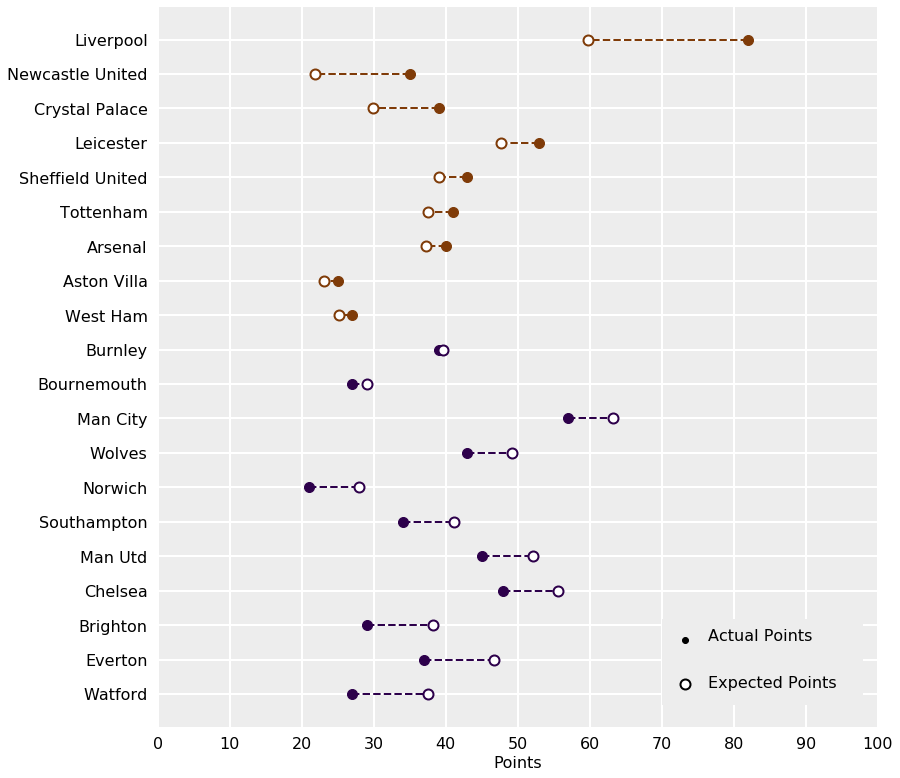

In [29]:
# creating figure and adding axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])

# get colours
colors = plt.get_cmap('PuOr',2)
y_vals = 0

# plotting the points
for team in sorted_teams_2:
    if actual_points_2[team] > expected_points_2[team]:
        fill_color = colors(0)
    else:
        fill_color = colors(1)
    ax.plot([actual_points_2[team],expected_points_2[team]],[y_vals,y_vals],linestyle = '--',linewidth=2,color=fill_color)
    ax.plot(actual_points_2[team],y_vals,'o',color=fill_color,markersize=10)
    ax.plot(expected_points_2[team],y_vals,'o',color='white',markeredgecolor=fill_color,markeredgewidth=2,markersize=10)
    y_vals += 1

# creating grid 
plt.grid(color='white',linewidth=2)

#setting up legend
leg = fig.add_axes([0.7,0.03,0.28,0.12])
leg.plot([0],[1],'o',color='black')
leg.text(0.3,1,'Actual Points')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Expected Points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)



# setting ticks
ax.set_xticks(np.arange(0,110,10))
ax.set_xlim(0,100)

# setting y axis
ax.set_yticks(np.arange(0,len(sorted_teams_2),1))
ax.set_yticklabels(sorted_teams)

ax.set_xlabel('Points')
plt.show()

In [30]:
players_2 = data_pl.full.unique()
len(players_2)

628

In [31]:
player_assists = {}
player_goals = {}
for player in players:
    mins = data_pl[data_pl.full==player].minutes.sum()/90
    if mins >= 10:
        player_assists[player] = data_pl[data_pl.full==player].assists.sum()/mins
        player_goals[player] = data_pl[data_pl.full==player].goals_scored.sum()/mins
        
    

In [32]:
top_20_goals = sorted(player_goals,key=player_goals.get,reverse=True)[:20]
top_20_assists = sorted(player_goals,key=player_assists.get,reverse=True)[:20]

In [33]:
updated_names = {}
for player in players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '.' + split_name[-1]

# update names with special characters
updated_names['Sergio Ag?ero'] = 'S. Agüero'
updated_names['Sadio Man?'] = 'S. Mané'
updated_names['Ra?l Jim?nez'] = 'R. Jiménez'
updated_names['Nicolas P?p?'] = 'N. Pépé'
updated_names['Emiliano Buend?a'] = 'E. Buendía'
updated_names['Adama Traor?'] = 'A. Traoré'
updated_names['Pascal Gro?'] = 'P. Groß'
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

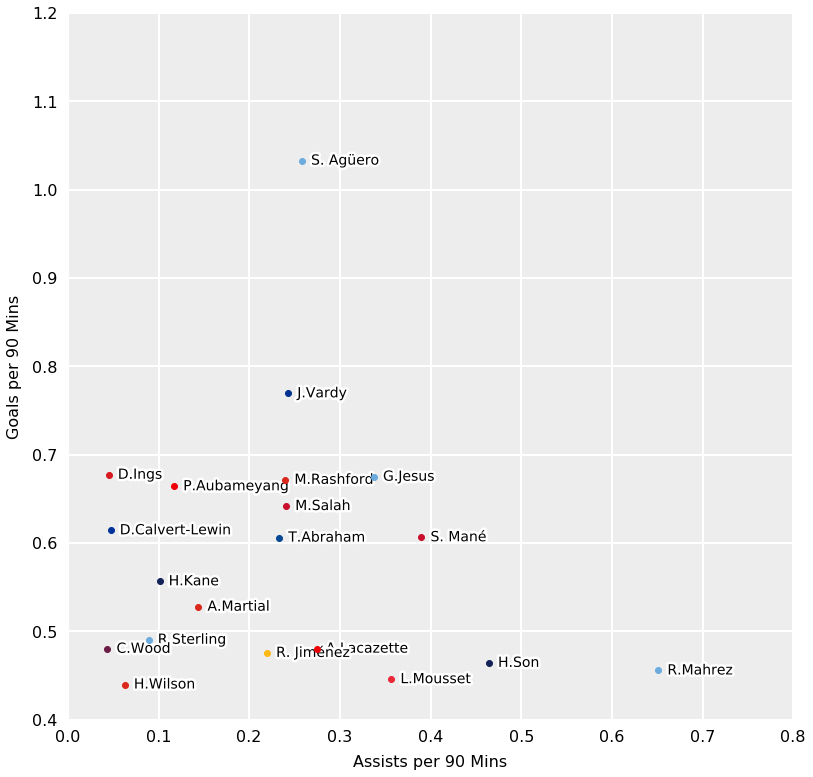

In [34]:
# Create Figure

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

# Plot player data
for player in top_player_goals:

    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1.2)
plt.show()

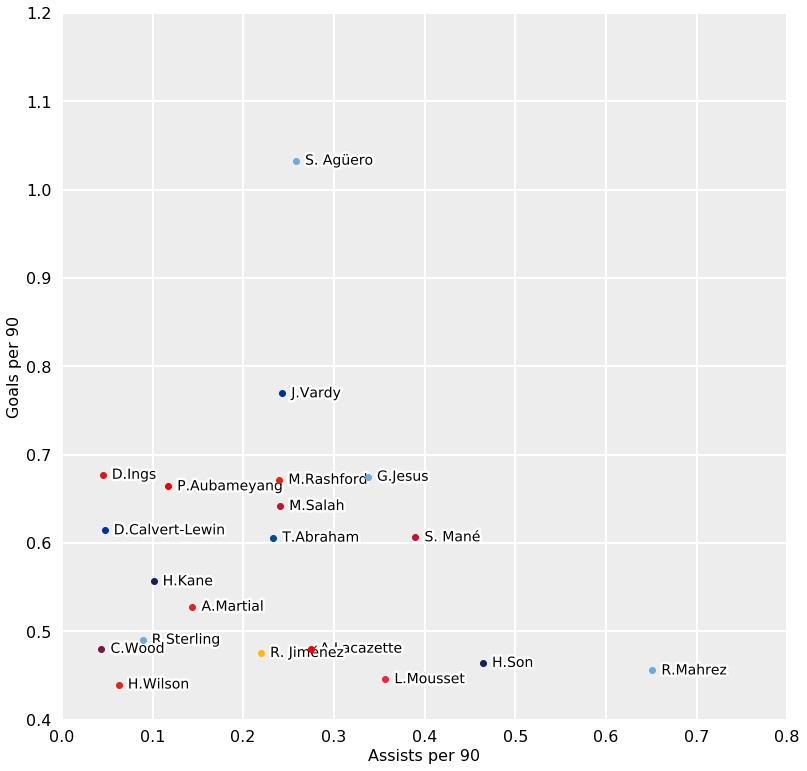

In [35]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

for player in top_20_goals:
    team = data_pl[data_pl['full']==player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player]+0.01,player_goals[player],updated_names[player],va='center',ha='left',size=14,zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'),pe.Normal()])

ax.grid(color='white',linewidth=2)

ax.set_xlabel('Assists per 90')
ax.set_ylabel('Goals per 90')

ax.set_xlim(0,0.8)
ax.set_ylim(0.4,1.2)
plt.show()

(-0.1, 0.8)

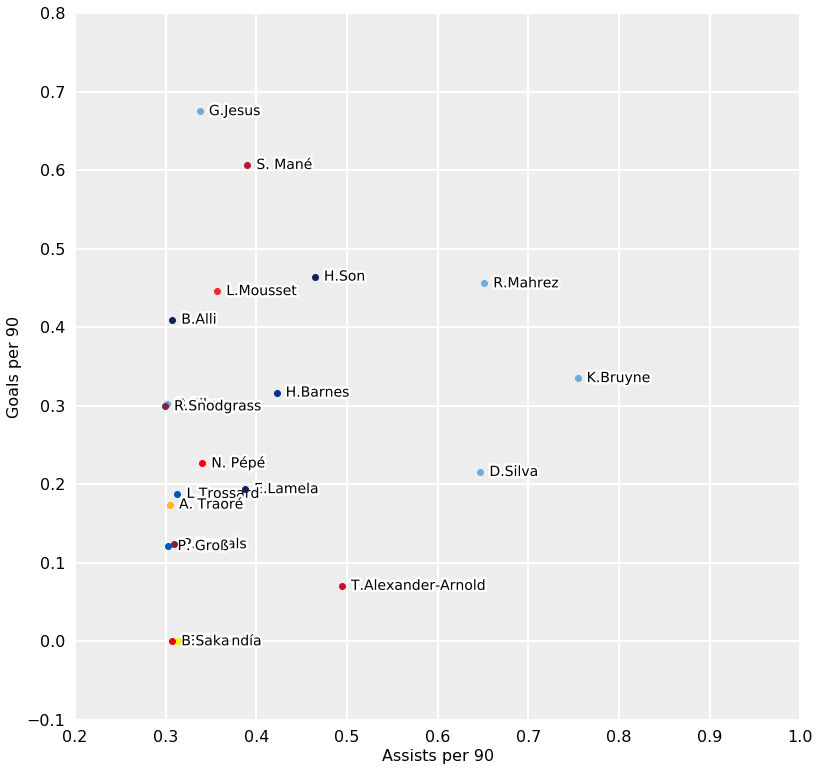

In [36]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

for player in top_20_assists:
    team = data_pl[data_pl['full']==player].team.iloc[0]
    ax.plot(player_assists[player],player_goals[player],'o',color = team_colors[team],zorder=3)
    text = ax.text(player_assists[player]+0.01,player_goals[player],updated_names[player],zorder=2,size=14,va='center',ha='left')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'),pe.Normal()])



plt.grid(color='w',linewidth=2)

ax.set_xlabel('Assists per 90')
ax.set_ylabel('Goals per 90')

ax.set_xlim(0.2,1)
ax.set_ylim(-0.1,0.8)

 3 Manchester City players lead the creativity charts which is not much of a surprise considering their style of play and especially how far ahead Kevin De Bruyne is of everyone else proving his capability as one of the best midfielders in the world

In [37]:
# team creativity is considered as the  sum of the creativity of all individual players added
team_creativity = {}

for team in teams:
    team_creativity[team] = data_pl[data_pl['team']==team].creativity.sum()

top_teams_creativity = sorted(team_creativity,key=team_creativity.get,reverse=True)
top_teams_creativity

['Man City',
 'Chelsea',
 'Liverpool',
 'Man Utd',
 'Leicester',
 'Brighton',
 'Everton',
 'Tottenham',
 'Wolves',
 'Aston Villa',
 'Arsenal',
 'Southampton',
 'West Ham',
 'Norwich',
 'Watford',
 'Sheffield United',
 'Burnley',
 'Bournemouth',
 'Newcastle United',
 'Crystal Palace']

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


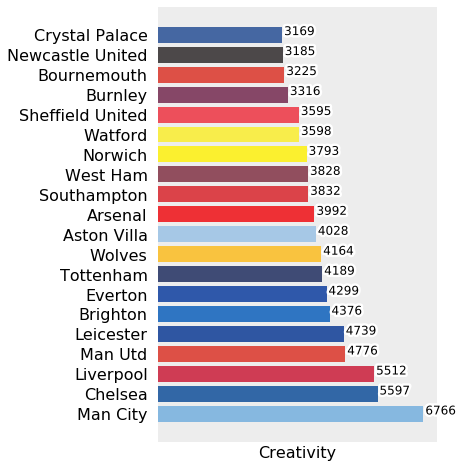

In [38]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)

y_dummy = 0

for team in top_teams_creativity:
    ax.barh(y_dummy,team_creativity[team],color=team_colors[team],alpha=0.8)
    text = ax.text(team_creativity[team]+50,y_dummy-0.02,int(round(team_creativity[team],0)),size=12,color='black')
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    y_dummy += 1
    
ax.set_xticks([])
ax.set_xlabel('Creativity')

ax.set_yticks(np.arange(0,21,1))
ax.set_yticklabels(top_teams_creativity)

plt.show()

In [39]:
players

array(['Aaron Connolly', 'Aaron Cresswell', 'Aaron Lennon', 'Aaron Mooy',
       'Aaron Ramsdale', 'Aaron Wan-Bissaka',
       'Abd-Al-Ali Morakinyo Olaposi Koiki', 'Abdoulaye Doucour?',
       'Adam Idah', 'Adam Lallana', 'Adam Masina', 'Adam Smith',
       'Adam Webster', 'Adama Traor?',
       'Addji Keaninkin Marc-Israel Guehi', 'Ademola Lookman',
       'Adrian Mariappa', 'Adri?n San Miguel del Castillo',
       'Ahmed El Mohamady', 'Ainsley Maitland-Niles', 'Akin Famewo',
       'Albian Ajeti', 'Alex Iwobi', 'Alex McCarthy',
       'Alex Oxlade-Chamberlain', 'Alexander Tettey',
       'Alexandre Nascimento Costa Silva', 'Alexandre Lacazette',
       'Alexis Mac Allister', 'Alexis S?nchez', 'Alfie Whiteman',
       'Alireza Jahanbakhsh', 'Alisson Ramses Becker',
       'Allan Saint-Maximin', 'Andre Gray', 'Andre Green',
       'Andreas Christensen', 'Andreas Pereira', 'Andrew Robertson',
       'Andrew Surman', 'Andriy Yarmolenko', 'Andros Townsend',
       'Andr? Filipe Tavares G

In [40]:
gk_saves = {}
gk_cleansheets = {}
for gk in players:
    mins = data_pl[data_pl.full == gk].minutes.sum()/90
    if mins >= 10:
        gk_saves[gk] = data_pl[data_pl.full==gk].saves.sum()/mins
        gk_cleansheets[gk] = data_pl[data_pl.full==gk].clean_sheets.sum()
        

In [41]:
top_saves = sorted(gk_saves,key=gk_saves.get,reverse=True)[:22]


In [43]:
top_saves
updated_names = {}
for player in top_saves:
    names = player.split(' ')
    updated_names[player] = names[0][0] + '.' + names[-1]
    
updated_names

{'Hugo Lloris': 'H.Lloris',
 'Martin Dubravka': 'M.Dubravka',
 'Bernd Leno': 'B.Leno',
 'Aaron Ramsdale': 'A.Ramsdale',
 'Tim Krul': 'T.Krul',
 'Tom Heaton': 'T.Heaton',
 'Vicente Guaita': 'V.Guaita',
 'Paulo Gazzaniga': 'P.Gazzaniga',
 'Mathew Ryan': 'M.Ryan',
 'Lukasz Fabianski': 'L.Fabianski',
 'Ben Foster': 'B.Foster',
 'Nick Pope': 'N.Pope',
 'Alex McCarthy': 'A.McCarthy',
 'Angus Gunn': 'A.Gunn',
 'Kasper Schmeichel': 'K.Schmeichel',
 'Rui Pedro dos Santos Patr?cio': 'R.Patr?cio',
 'Dean Henderson': 'D.Henderson',
 'David de Gea': 'D.Gea',
 'Jordan Pickford': 'J.Pickford',
 'Alisson Ramses Becker': 'A.Becker',
 'Ederson Santana de Moraes': 'E.Moraes',
 'Kepa Arrizabalaga': 'K.Arrizabalaga'}

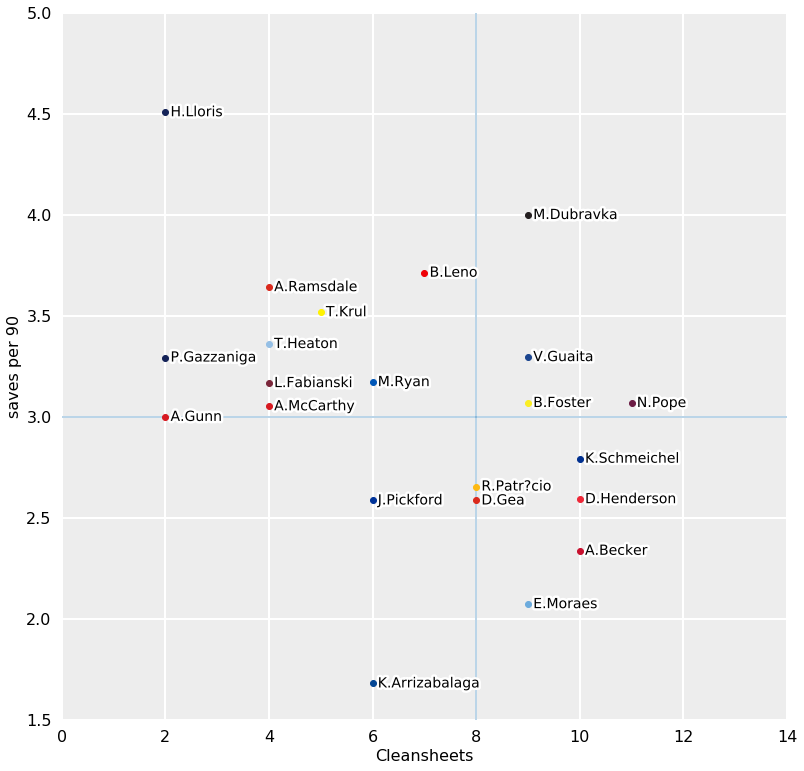

In [44]:
fig = plt.figure(figsize=(13,13))
ax= fig.add_subplot(111)

for player in top_saves:
    team = data_pl[data_pl['full']==player].team.iloc[0]
    ax.plot(gk_cleansheets[player],gk_saves[player],'o',color = team_colors[team],zorder = 3)
    text = ax.text(gk_cleansheets[player]+0.1,gk_saves[player],updated_names[player],size=14,va='center',ha='left',zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

plt.grid(color='white',linewidth=2)

#setting labels for axis
ax.set_xlabel('Cleansheets')
ax.set_ylabel('saves per 90')

# setting ticks
ax.set_xlim(0,14)
ax.set_ylim(1.5,5)

ax.axvline(x=8,ymax=3,alpha=0.4)
ax.axhline(y=3,alpha=0.4)

plt.show()

Keepers in the bottom right segment of the graph are generally placed in defensively sound teams as they do not have to make lots of saves per 90 but wrack up a lot of cleansheets while on the other hand H.Lloris makes the most saves per 90 but does not have many cleansheets showing the defensive vulnerabilities of tottenham which might be a reason for the signing of defensive minded manager J.Mourinho

In [45]:
epl_data.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

In [46]:
epl_data['date'] = pd.to_datetime(epl_data['date'])

In [47]:
months = epl_data['date'].dt.month.unique()
goals_in_months = {}
no_of_matches = {}

In [48]:
for month in months:
    goals_in_months[month] = epl_data[epl_data['date'].dt.month==month].scored.sum()
    no_of_matches[month] = epl_data[epl_data['date'].dt.month==month].scored.count()/2

In [49]:
goals_in_months

{8: 104, 9: 101, 10: 81, 11: 105, 12: 168, 1: 107, 2: 92, 3: 26}

In [50]:
no_of_matches
goals_per_match = {}
for month in gaols_

SyntaxError: invalid syntax (<ipython-input-50-5903dba3dcbf>, line 3)

In [51]:
sorted_goals = sorted(goals_in_months,key=goals_in_months.get,reverse=True)

In [52]:
sorted_matches = sorted(no_of_matches,key=no_of_matches.get,reverse=False)

In [53]:
month_name = ['August','September','October','November','December','January','February','March']



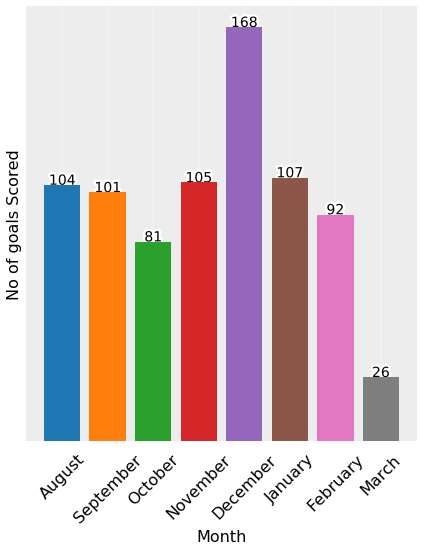

In [54]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
x_val = 0
for month in goals_in_months.keys():
    ax.bar(x_val,goals_in_months[month],zorder=3)
    text = ax.text(x_val,goals_in_months[month]+0.1,goals_in_months[month],size=14,ha='center',zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
    x_val += 1
    
ax.set_yticks([])

ax.set_ylabel('No of goals Scored')
ax.set_xlabel('Month')

ax.set_xticks(np.arange(0,8,1))
ax.set_xticklabels(month_name,rotation=45)
        
plt.grid(color='white',linewidth=2,alpha=0.2)

In [55]:
goals_in_months.keys()

dict_keys([8, 9, 10, 11, 12, 1, 2, 3])

In [56]:
import seaborn as sns
sns.set_style('darkgrid')

In [57]:
goals = list(goals_in_months.values())

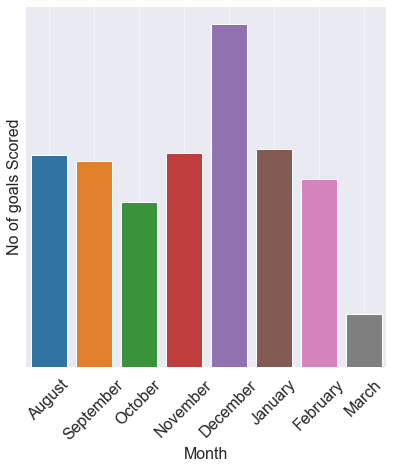

In [58]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
sns.barplot([i for i in range(1,len(goals)+1,1)],goals)

ax.set_yticks([])

ax.set_ylabel('No of goals Scored')
ax.set_xlabel('Month')

ax.set_xticks(np.arange(0,8,1))
ax.set_xticklabels(month_name,rotation=45)

plt.grid(color='white',linewidth=1,alpha=0.5)
plt.show()        